# 2 Classification of handwritten digits
## 2.1 Downloading MNIST

In [1]:
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torch import nn
from torch.nn.functional import softmax, relu, sigmoid, tanh
from torchvision import datasets, transforms
import os
from ps3_functions import train
import matplotlib.pyplot as plt
from torch.nn import functional as F

path_figures = os.getcwd().replace('code','figures')
if not os.path.exists(path_figures):
    os.makedirs(path_figures)

path_save = os.path.join(os.getcwd(), 'models')
if not os.path.exists(path_save):
    os.makedirs(path_save)

path_results = os.path.join(os.getcwd(), 'results')
if not os.path.exists(path_results):
    os.makedirs(path_results)

path_outputs = os.path.join(os.getcwd(), 'outputs')
if not os.path.exists(path_outputs):
    os.makedirs(path_outputs)

mnist_train = datasets.MNIST(root = 'data', train=True, download=True, transform = transforms.ToTensor())
mnist_test = datasets.MNIST(root = 'data', train=False, download=True, transform = transforms.ToTensor())

In [2]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
print(device)

cuda


## 2.2 Feed-forward Neural Network
### please see the code for section 1-6
### Fill in the provided train function, completing the TODOs to build a training loop and an evaluation function. Then train the model for 100 epochs with a batch size of 128, and a learning rate of 0.5. This training might take a few minutes.

In [4]:
# training parameters
bs = 128

In [5]:
# create training set and testing set
train_dataloader = DataLoader(mnist_train, batch_size=bs, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=bs, shuffle=True)

In [6]:
lr = 0.5
num_epochs = 50
model_name = 'relu'

class FeedForwardNet(nn.Module):
    """ Simple feed forward network with one hidden layer."""
    def __init__(self): # initialize the model
        super(FeedForwardNet, self).__init__() # call for the parent class to initialize
        self.W1 = nn.Parameter(nn.init.uniform_(torch.empty((784, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))
        self.b1 = nn.Parameter(nn.init.uniform_(torch.empty((1, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))

        self.W2 = nn.Parameter(nn.init.uniform_(torch.empty((128, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))
        self.b2 = nn.Parameter(nn.init.uniform_(torch.empty((1, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))

        # Make sure to add another weight and bias vector to represent the hidden layer.

    def forward(self, x):
        # put the logic here.
        layer1_out = relu(torch.matmul(x, self.W1) + self.b1)
        layer2_out = softmax(relu(torch.matmul(layer1_out, self.W2) + self.b2))

        predictions = layer2_out

        return predictions

model = FeedForwardNet()
model.to(device)
ce_loss = nn.CrossEntropyLoss()
SGD = torch.optim.SGD(model.parameters(), lr = lr)
train_acc_list, test_acc_list = train(model, ce_loss, SGD, train_dataloader, test_dataloader, num_epochs=num_epochs)

path_save = os.path.join(os.getcwd(), 'models')
if not os.path.exists(path_save):
    os.makedirs(path_save)

torch.save(model.state_dict(), os.path.join(path_save, 'model_{}_bs_{}_lr_{}_epoch_{}.pth'.format(str(model_name), str(bs), str(lr), str(num_epochs))))

/tmp/ipykernel_20559/4262507057.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  layer2_out = softmax(relu(torch.matmul(layer1_out, self.W2) + self.b2))


 EPOCH 0. Progress: 0.0%. 
 Train accuracy: 0.6693333387374878. Test accuracy: 0.6650999784469604
 EPOCH 10. Progress: 20.0%. 
 Train accuracy: 0.8807333707809448. Test accuracy: 0.8710999488830566
 EPOCH 20. Progress: 40.0%. 
 Train accuracy: 0.8894000053405762. Test accuracy: 0.8791999816894531
 EPOCH 30. Progress: 60.0%. 
 Train accuracy: 0.8918833136558533. Test accuracy: 0.8805999755859375
 EPOCH 40. Progress: 80.0%. 
 Train accuracy: 0.9886333346366882. Test accuracy: 0.9739999771118164


###  Try training this without a non-linearity between the layers (linear activation), and then try adding a sigmoid non-linearity both before the hidden layer and after the hidden layer, recording your test accuracy results for each in a table.


In [6]:
lr = 0.5
num_epochs = 50
model_name = 'linear'

class FeedForwardNet(nn.Module):
    """ Simple feed forward network with one hidden layer."""
    def __init__(self): # initialize the model
        super(FeedForwardNet, self).__init__() # call for the parent class to initialize
        self.W1 = nn.Parameter(nn.init.uniform_(torch.empty((784, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))
        self.b1 = nn.Parameter(nn.init.uniform_(torch.empty((1, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))

        self.W2 = nn.Parameter(nn.init.uniform_(torch.empty((128, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))
        self.b2 = nn.Parameter(nn.init.uniform_(torch.empty((1, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))

        # Make sure to add another weight and bias vector to represent the hidden layer.

    def forward(self, x):
        # put the logic here.
        layer1_out = torch.matmul(x, self.W1) + self.b1
        layer2_out = softmax(torch.matmul(layer1_out, self.W2) + self.b2)

        predictions = layer2_out

        return predictions

from ps3_functions import train

model = FeedForwardNet()
model.to(device)
ce_loss = nn.CrossEntropyLoss()
SGD = torch.optim.SGD(model.parameters(), lr = lr)
train_acc_list, test_acc_list = train(model, ce_loss, SGD, train_dataloader, test_dataloader, num_epochs=num_epochs)

path_save = os.path.join(os.getcwd(), 'models')
if not os.path.exists(path_save):
    os.makedirs(path_save)

torch.save(model, os.path.join(path_save, 'model_{}_bs_{}_lr_{}_epoch_{}.pth'.format(str(model_name), str(bs), str(lr), str(num_epochs))))

/tmp/ipykernel_12537/251991051.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  layer2_out = softmax(torch.matmul(layer1_out, self.W2) + self.b2)


 EPOCH 0. Progress: 0.0%. 
 Train accuracy: 0.9097499847412109. Test accuracy: 0.9124999642372131
 EPOCH 10. Progress: 20.0%. 
 Train accuracy: 0.9343166947364807. Test accuracy: 0.9277999997138977
 EPOCH 20. Progress: 40.0%. 
 Train accuracy: 0.9384166598320007. Test accuracy: 0.9284999966621399
 EPOCH 30. Progress: 60.0%. 
 Train accuracy: 0.9427833557128906. Test accuracy: 0.9299999475479126
 EPOCH 40. Progress: 80.0%. 
 Train accuracy: 0.9448000192642212. Test accuracy: 0.9304999709129333


In [12]:
lr = 0.5
num_epochs = 50
model_name = 'sigmoid'

class FeedForwardNet(nn.Module):
    """ Simple feed forward network with one hidden layer."""
    def __init__(self): # initialize the model
        super(FeedForwardNet, self).__init__() # call for the parent class to initialize
        self.W1 = nn.Parameter(nn.init.uniform_(torch.empty((784, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))
        self.b1 = nn.Parameter(nn.init.uniform_(torch.empty((1, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))

        self.W2 = nn.Parameter(nn.init.uniform_(torch.empty((128, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))
        self.b2 = nn.Parameter(nn.init.uniform_(torch.empty((1, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))

        # Make sure to add another weight and bias vector to represent the hidden layer.

    def forward(self, x):
        # put the logic here.
        layer1_out = sigmoid(torch.matmul(x, self.W1) + self.b1)
        layer2_out = softmax(sigmoid(torch.matmul(layer1_out, self.W2) + self.b2))

        predictions = layer2_out

        return predictions

from ps3_functions import train

model = FeedForwardNet()
model.to(device)
ce_loss = nn.CrossEntropyLoss()
SGD = torch.optim.SGD(model.parameters(), lr = lr)
train_acc_list, test_acc_list = train(model, ce_loss, SGD, train_dataloader, test_dataloader, num_epochs=num_epochs)

path_save = os.path.join(os.getcwd(), 'models')
if not os.path.exists(path_save):
    os.makedirs(path_save)

torch.save(model, os.path.join(path_save, 'model_{}_bs_{}_lr_{}_epoch_{}.pth'.format(str(model_name), str(bs), str(lr), str(num_epochs))))

/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/tmp/ipykernel_12537/1446017766.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  layer2_out = softmax(sigmoid(torch.matmul(layer1_out, self.W2) + self.b2))


 EPOCH 0. Progress: 0.0%. 
 Train accuracy: 0.7341499924659729. Test accuracy: 0.7436999678611755
 EPOCH 10. Progress: 20.0%. 
 Train accuracy: 0.8754333257675171. Test accuracy: 0.882599949836731
 EPOCH 20. Progress: 40.0%. 
 Train accuracy: 0.89410001039505. Test accuracy: 0.9005999565124512
 EPOCH 30. Progress: 60.0%. 
 Train accuracy: 0.903083324432373. Test accuracy: 0.9096999764442444
 EPOCH 40. Progress: 80.0%. 
 Train accuracy: 0.9084333181381226. Test accuracy: 0.9140999913215637


### Try adjusting the learning rate (by making it smaller) if your model is not converging/improving in accuracy. You might also try increasing the number of epochs used.

In [13]:
lr = 1e-3
num_epochs = 50
model_name = 'learning_rate'

class FeedForwardNet(nn.Module):
    """ Simple feed forward network with one hidden layer."""
    def __init__(self): # initialize the model
        super(FeedForwardNet, self).__init__() # call for the parent class to initialize
        self.W1 = nn.Parameter(nn.init.uniform_(torch.empty((784, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))
        self.b1 = nn.Parameter(nn.init.uniform_(torch.empty((1, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))

        self.W2 = nn.Parameter(nn.init.uniform_(torch.empty((128, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))
        self.b2 = nn.Parameter(nn.init.uniform_(torch.empty((1, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))

        # Make sure to add another weight and bias vector to represent the hidden layer.

    def forward(self, x):
        # put the logic here.
        layer1_out = relu(torch.matmul(x, self.W1) + self.b1)
        layer2_out = softmax(relu(torch.matmul(layer1_out, self.W2) + self.b2))

        predictions = layer2_out

        return predictions

from ps3_functions import train

model = FeedForwardNet()
model.to(device)
ce_loss = nn.CrossEntropyLoss()
SGD = torch.optim.SGD(model.parameters(), lr = lr)
train_acc_list, test_acc_list = train(model, ce_loss, SGD, train_dataloader, test_dataloader, num_epochs=num_epochs)

path_save = os.path.join(os.getcwd(), 'models')
if not os.path.exists(path_save):
    os.makedirs(path_save)

torch.save(model, os.path.join(path_save, 'model_{}_bs_{}_lr_{}_epoch_{}.pth'.format(str(model_name), str(bs), str(lr), str(num_epochs))))

/tmp/ipykernel_12537/3423974620.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  layer2_out = softmax(relu(torch.matmul(layer1_out, self.W2) + self.b2))


 EPOCH 0. Progress: 0.0%. 
 Train accuracy: 0.11543333530426025. Test accuracy: 0.11549999564886093
 EPOCH 10. Progress: 20.0%. 
 Train accuracy: 0.4541333317756653. Test accuracy: 0.45819997787475586
 EPOCH 20. Progress: 40.0%. 
 Train accuracy: 0.5333666801452637. Test accuracy: 0.5324000120162964
 EPOCH 30. Progress: 60.0%. 
 Train accuracy: 0.5476999878883362. Test accuracy: 0.5475000143051147
 EPOCH 40. Progress: 80.0%. 
 Train accuracy: 0.5537499785423279. Test accuracy: 0.5521000027656555


### Lastly, experiment with the width of the hidden layer, keeping the activation function that performs best. Remember to add these results to your table.


In [14]:
lr = 0.5
num_epochs = 50
hidden_width = 64
model_name = 'width_hidden'

class FeedForwardNet(nn.Module):
    """ Simple feed forward network with one hidden layer."""
    def __init__(self): # initialize the model
        super(FeedForwardNet, self).__init__() # call for the parent class to initialize
        self.W1 = nn.Parameter(nn.init.uniform_(torch.empty((784, hidden_width)), a=-np.sqrt(1/hidden_width), b=np.sqrt(1/hidden_width)))
        self.b1 = nn.Parameter(nn.init.uniform_(torch.empty((1, hidden_width)), a=-np.sqrt(1/hidden_width), b=np.sqrt(1/hidden_width)))

        self.W2 = nn.Parameter(nn.init.uniform_(torch.empty((hidden_width, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))
        self.b2 = nn.Parameter(nn.init.uniform_(torch.empty((1, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))

        # Make sure to add another weight and bias vector to represent the hidden layer.

    def forward(self, x):
        # put the logic here.
        layer1_out = relu(torch.matmul(x, self.W1) + self.b1)
        layer2_out = softmax(relu(torch.matmul(layer1_out, self.W2) + self.b2))

        predictions = layer2_out

        return predictions

from ps3_functions import train

model = FeedForwardNet()
model.to(device)
ce_loss = nn.CrossEntropyLoss()
SGD = torch.optim.SGD(model.parameters(), lr = lr)
train_acc_list, test_acc_list = train(model, ce_loss, SGD, train_dataloader, test_dataloader, num_epochs=num_epochs)

torch.save(model, os.path.join(path_save, 'model_{}_{}_bs_{}_lr_{}_epoch_{}.pth'.format(str(model_name), str(hidden_width), str(bs), str(lr), str(num_epochs))))

/tmp/ipykernel_12537/2455853343.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  layer2_out = softmax(relu(torch.matmul(layer1_out, self.W2) + self.b2))


 EPOCH 0. Progress: 0.0%. 
 Train accuracy: 0.6707500219345093. Test accuracy: 0.6680999994277954
 EPOCH 10. Progress: 20.0%. 
 Train accuracy: 0.8770833611488342. Test accuracy: 0.8714999556541443
 EPOCH 20. Progress: 40.0%. 
 Train accuracy: 0.9767667055130005. Test accuracy: 0.967799961566925
 EPOCH 30. Progress: 60.0%. 
 Train accuracy: 0.9853333234786987. Test accuracy: 0.972000002861023
 EPOCH 40. Progress: 80.0%. 
 Train accuracy: 0.9880666732788086. Test accuracy: 0.9723999500274658


### Question 2.2.1. What percentage classification accuracy does this network achieve?
Answer: The network is able to achieve about 0.96 testing accuracy.

### Question 2.2.2. Create a plot of the training and test error vs the number of iterations. How many iterations are sufficient to reach good performance?
Answer: From the following figure, about 20 iterations is enough to reach good performance (using relu, lr=0.5 configuration). 

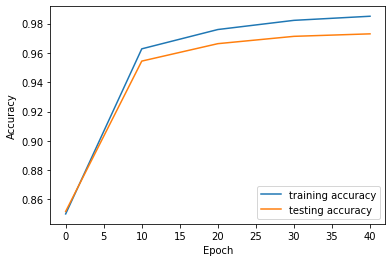

In [29]:
import matplotlib.pyplot as plt

def func_plotAcc(train_acc_list, test_acc_list, plot_name):
    train_acc_list_py, test_acc_list_py = [], []

    for train_acc, test_acc in zip(train_acc_list, test_acc_list):
        train_acc.to(torch.device('cpu')), test_acc.to(torch.device('cpu'))
        train_acc_list_py.append(train_acc.cpu().numpy()), test_acc_list_py.append(test_acc.cpu().numpy())
    epochs = np.arange(0, 50, 10)
    fig, ax = plt.subplots(1,1)
    ax.plot(epochs, train_acc_list_py, label='training accuracy')
    ax.plot(epochs, test_acc_list_py, label='testing accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    plt.show()

    fig.savefig(os.path.join(path_figures, plot_name))

func_plotAcc(train_acc_list, test_acc_list, 'section2-1.pdf')


### Question 2.2.3. Print the confusion matrix showing which digits were misclassified, and what they were misclassified as. What numbers are frequently confused with one another by your model?
Answer: The confusion matrix printed below indicates that generally the model correctly classifies the digits. The biggest confusion comes from digit 4 with digit 9.

In [11]:
from sklearn.metrics import confusion_matrix
output_list, label_list = [], []
with torch.no_grad():
    for data, targets in test_dataloader:
        data = data.to('cuda')
        targets = targets.to('cuda')
        test_input = data.view(-1, 784)
        test_output_onehot = model(test_input)
        test_output = torch.argmax(test_output_onehot, dim=1)
        output_list.extend(test_output.cpu().numpy()), label_list.extend(targets.cpu().numpy())
        
confusion_matrix(label_list, output_list)

/tmp/ipykernel_12537/251991051.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  layer2_out = softmax(torch.matmul(layer1_out, self.W2) + self.b2)


array([[ 955,    0,    1,    1,    1,    6,   11,    2,    3,    0],
       [   0, 1113,    5,    3,    1,    4,    4,    2,    3,    0],
       [   9,    7,  926,   11,   16,    7,    8,   13,   29,    6],
       [   2,    0,   23,  917,    1,   28,    3,    9,   19,    8],
       [   1,    5,    4,    1,  930,    0,   10,    3,    3,   25],
       [   7,    2,    3,   25,   15,  791,   13,    3,   26,    7],
       [  10,    3,    6,    2,    7,   15,  912,    2,    1,    0],
       [   3,    7,   24,    4,   10,    1,    0,  950,    2,   27],
       [   5,    6,    3,   19,    9,   35,    9,   10,  873,    5],
       [  12,    7,    1,    8,   26,    8,    0,   16,    9,  922]])

### Question 2.2.4. Experiment with the learning rate, optimizer and activation function of your network. Report the best accuracy and briefly describe the training scheme that reached this accuracy.
Answer: After experimenting with a series models shown above, the best testing accuracy (0.96) is achieved when lr = 0.5 with SGD and relu activation function.

# 3 Autoencoder
## 3.1 MNIST
### section 1-3, please check the relevant functions
### Adapt your training function for the autoencoder. Use the same batch size and number of epochs (128 and 100), but use the ADAM optimizer instead of Gradient Descent. Use Mean Squared Error for your reconstruction loss.

In [15]:
bs = 128

In [20]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.enc_lin1 = nn.Linear(784, 1000)
        self.enc_lin2 = nn.Linear(1000, 500)
        self.enc_lin3 = nn.Linear(500, 250)
        self.enc_lin4 = nn.Linear(250, 2)

        self.dec_lin1 = nn.Linear(2, 250)
        self.dec_lin2 = nn.Linear(250, 500)
        self.dec_lin3 = nn.Linear(500, 1000)
        self.dec_lin4 = nn.Linear(1000, 784)
        # define additional layers here


    def encode(self, x):
        x = tanh(self.enc_lin1(x))
        x = tanh(self.enc_lin2(x))
        x = tanh(self.enc_lin3(x))
        x = sigmoid(self.enc_lin4(x))

        # ... additional layers, plus possible nonlinearities.
        return x

    def decode(self, z):
        # ditto, but in reverse
        z = tanh(self.dec_lin1(z))
        z = tanh(self.dec_lin2(z))
        z = tanh(self.dec_lin3(z))
        z = tanh(self.dec_lin4(z))

        return z

    def forward(self, x):
        z = self.encode(x)
        out = self.decode(z)
        return out

def train_ae(model, loss_fn, optimizer, train_loader, test_loader, num_epochs):
    # num_epochs = 100 # obviously, this is too many. I don't know what this author was thinking.

    train_loss_list, test_loss_list = [], []

    for epoch in range(num_epochs):
        # loop through each data point in the training set
        for data, targets in train_loader:
            optimizer.zero_grad()

            # run the model on the data
            data = data.to('cuda')
            targets = targets.to('cuda')
            model_input = data.view(-1, 784)

            # TODO: Turn the 28 by 28 image tensors into a 784 dimensional tensor.
            out = model(model_input)

            # Calculate the loss
            loss = loss_fn(out,model_input)

            # Find the gradients of our loss via backpropogation
            loss.backward()

            # Adjust accordingly with the optimizer
            optimizer.step()

        
        # Give status reports every 100 epochs
        if epoch % 10==0:
            train_loss, test_loss = evaluate_ae(model, train_loader, loss_fn), evaluate_ae (model, test_loader, loss_fn)
            train_loss_list.append(train_loss), test_loss_list.append(test_loss)
            print(f" EPOCH {epoch}. Progress: {epoch/num_epochs*100}%. ")
            print(f" Train loss: {train_loss}. Test loss: {test_loss}") #TODO: implement the evaluate function to provide performance statistics during training.

    return train_loss_list, test_loss_list

def evaluate_ae(model, evaluation_set, loss_fn):
    with torch.no_grad(): # this disables backpropogation, which makes the model run much more quickly.
        # TODO: Fill in the rest of the evaluation function.
        loss_sum = 0

        for data, targets in evaluation_set:
            data = data.to('cuda')
            # targets = targets.to('cuda')
            test_input = data.view(-1, 784)
            test_output = model(test_input)

            loss_sum += loss_fn(test_input, test_output)
        
        loss = loss_sum / len(evaluation_set.dataset)
        
    return loss

In [7]:
lr = 0.003
num_epochs = 10
model_name = 'autoencoder'

model_ae = Autoencoder()
model_ae.to(device)
mse_loss = nn.MSELoss()
optimizer_ae = torch.optim.Adam(model_ae.parameters(), lr=lr)
train_acc_list, test_acc_list = train_ae(model_ae, mse_loss, optimizer_ae, train_dataloader, test_dataloader, num_epochs)

torch.save(model, os.path.join(path_save, 'model_{}_bs_{}_lr_{}_epoch_{}.pth'.format(str(model_name), str(bs), str(lr), str(num_epochs))))

/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


 EPOCH 0. Progress: 0.0%. 
 Train loss: 0.0003743564593605697. Test loss: 0.00037780642742291093


### After training your model, plot the 2 dimensional embeddings of 1000 digits, colored by the image labels.

In [16]:
data_loader_1000_digits = DataLoader(mnist_train, batch_size=1000, shuffle=True)
for data, target in data_loader_1000_digits:
    with torch.no_grad():
        data = data.to(device)
        model_input = data.view(-1, 784)
        embedds = model_ae.encode(model_input).cpu().numpy()
        preds = model_ae(model_input).cpu().numpy()
        labels = target.cpu().numpy()
        inputs = model_input.cpu().numpy()
        break # just load one batch

/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


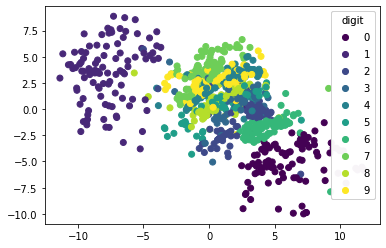

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(embedds[:,0], embedds[:,1], c=labels)
legend = ax.legend(*scatter.legend_elements(), title='digit')
ax.add_artist(legend)
fig.savefig(os.path.join(path_figures,'Section_3_1.pdf'))
plt.show()

### Produce side-by-side plots of one original and reconstructed sample of each digit (0 - 9). You can use the save_image function from torchvision.utils.

In [10]:
# find a sample idx with each digit
sample_idx_list, digit_list = [], []
for idx in range(labels.shape[0]):
    for digit in range(10):
        if labels[idx] == digit:
            if digit not in digit_list:
                sample_idx_list.append(idx)
                digit_list.append(digit)

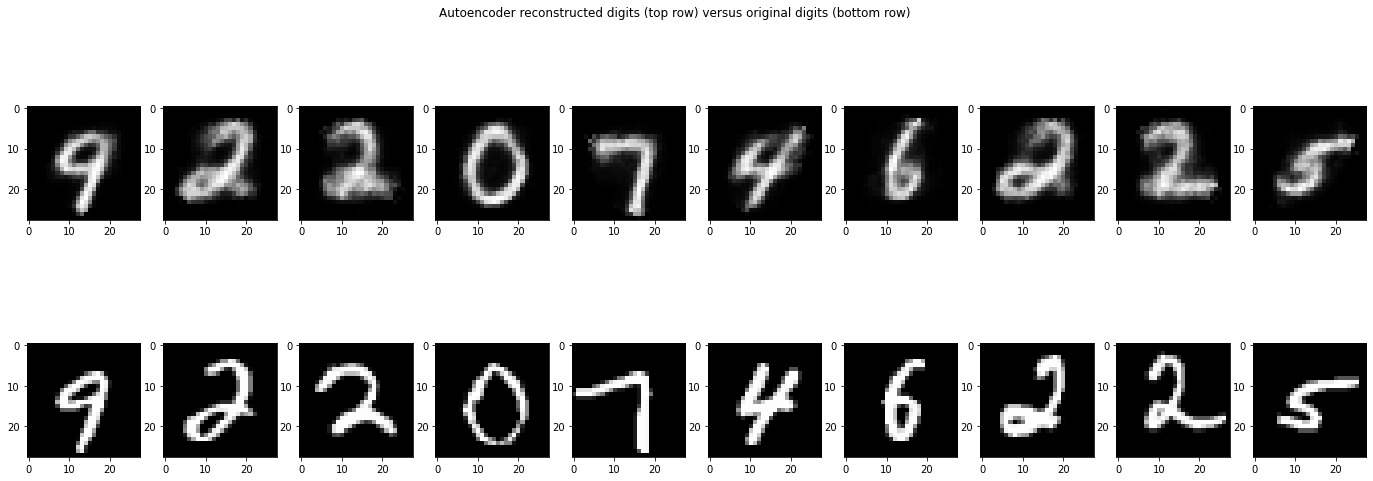

In [19]:
fig, axes = plt.subplots(2,10)
fig.set_size_inches(24,8)

for i in range(10):
    preds_digit = preds[sample_idx_list[i]]
    input_digit = inputs[sample_idx_list[i]]
    axes[0][i].imshow(np.reshape(preds_digit, (28,28)), cmap='gray')
    axes[1][i].imshow(np.reshape(input_digit, (28,28)), cmap='gray')
fig.suptitle('Autoencoder reconstructed digits (top row) versus original digits (bottom row)')
fig.savefig(os.path.join(path_figures,'Section_3_2.pdf'))
plt.show()


### Now for something fun: locate the embeddings of two distinct images, and interpolate between them to produce some intermediate point in the latent space. Visualize this point in the 2D embedding. Then, run your decoder on this fabricated “embedding” to see if it the output looks anything like a handwritten digit. You might try interpolating between and within several different classes.

In [33]:
digit_idx_1 = 0
digit_idx_2 = 1

for data, target in data_loader_1000_digits:
    with torch.no_grad():
        data = data.to(device)
        model_input = data.view(-1, 784)
        embedds_1 = model_ae.encode(model_input[digit_list[digit_idx_1],:]).cpu().numpy()
        embedds_2 = model_ae.encode(model_input[digit_list[digit_idx_2],:]).cpu().numpy()
        embedds_frab = (embedds_1 + embedds_2)/2
        preds = model_ae.decode(torch.from_numpy(embedds_frab).to(device)).cpu().numpy()
        break # just load one batch


/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


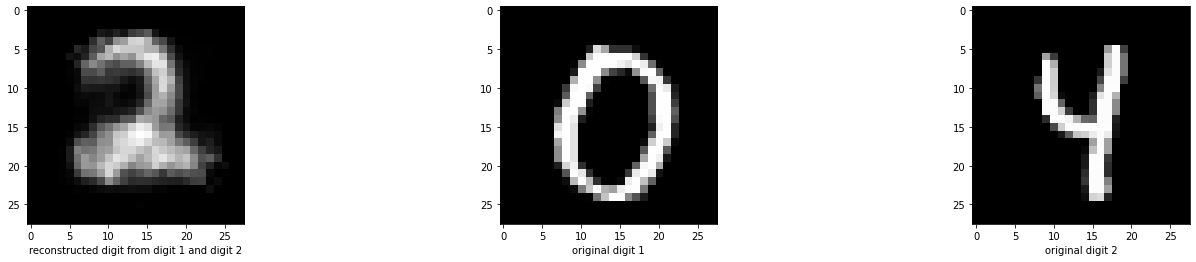

In [37]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(24,4)

preds_digit = preds
digit_1 = model_input[digit_list[digit_idx_1],:].cpu().numpy()
digit_2 = model_input[digit_list[digit_idx_2],:].cpu().numpy()

axes[0].imshow(np.reshape(preds_digit, (28,28)), cmap='gray')
axes[0].set_xlabel('reconstructed digit from digit 1 and digit 2')
axes[1].imshow(np.reshape(digit_1, (28,28)), cmap='gray')
axes[1].set_xlabel('original digit 1')
axes[2].imshow(np.reshape(digit_2, (28,28)), cmap='gray')
axes[2].set_xlabel('original digit 2')

fig.savefig(os.path.join(path_figures,'Section_3_3.pdf'))
plt.show()

### Question 3.1.1. Do the colors easily separate, or are they all clumped together? Which numbers are frequently embedded close together, and what does this mean?
Answer: The colors are generally separable. The embeddings of 5 and 6 seem to clump together and this means that the handwritten digits of 5 and 6 are harder to separate.

### Question 3.1.2. How realistic were the images you generated by interpolating between points in the latent space? Can you think of a better way to generate images with an autoencoder?
Answer: The image I interpolated looks quite realistic to digit 2. A better way to generate images is to sample the embeddings based on some continuous distribution such as Gaussian, which will be similar to the idea of variational autoencoder.

## 3.2 Biological Data: Retinal Bipolar Dataset

In [1]:
import pickle

path_RB_root = os.getcwd().replace('code','data')

with open(os.path.join(path_RB_root, 'retinal-bipolar-data.pickle'), 'rb') as f:
    RB_data = pickle.load(f)

with open(os.path.join(path_RB_root, 'retinal-bipolar-metadata.pickle'), 'rb') as f:
    RB_meta_data = pickle.load(f)

### Create a training and testing split of the data (choose an 80-20 split) and generate minibatches from your training data (shuffling the order of the points between epochs).

In [31]:
n_split = 0.8
n_feature = 784
bs = 128

totalNumOfSample = int(n_split*RB_data.shape[0])
RB_data_train = torch.Tensor(RB_data.values[:totalNumOfSample, :n_feature].astype(np.float32))
RB_label_train = torch.Tensor(RB_meta_data['CLUSTER'].values[:totalNumOfSample].astype(np.float32))
RB_data_test = torch.Tensor(RB_data.values[totalNumOfSample:, :n_feature].astype(np.float32))
RB_label_test = torch.Tensor(RB_meta_data['CLUSTER'].values[totalNumOfSample:].astype(np.float32))

RB_train_dataset = TensorDataset(RB_data_train, RB_label_train)
RB_test_dataset = TensorDataset(RB_data_test, RB_label_test)

RB_train_dataloader = DataLoader(RB_train_dataset, batch_size=bs, shuffle=True)
RB_test_dataloader = DataLoader(RB_test_dataset, batch_size=RB_data_test.cpu().numpy().shape[0], shuffle=True)


In [32]:
print(RB_data_train.shape)
print(RB_label_train.shape)
print(RB_data_test.shape)
print(RB_label_test.shape)

torch.Size([17241, 784])
torch.Size([17241])
torch.Size([4311, 784])
torch.Size([4311])


### Starting with the same autoencoder architecture as the last section, change the last layer’s activation to a linear (instead of a sigmoid activation)

In [21]:
class Autoencoder_RB(Autoencoder):
    def encode(self, x):
        x = tanh(self.enc_lin1(x))
        x = tanh(self.enc_lin2(x))
        x = tanh(self.enc_lin3(x))
        x = self.enc_lin4(x)

        # ... additional layers, plus possible nonlinearities.
        return x

In [34]:
lr = 0.003
num_epochs = 100
model_name = 'autoencoder_RB'

model_ae = Autoencoder_RB()
model_ae.to(device)
mse_loss = nn.MSELoss()
optimizer_ae = torch.optim.Adam(model_ae.parameters(), lr=lr)
train_acc_list, test_acc_list = train_ae(model_ae, mse_loss, optimizer_ae, RB_train_dataloader, RB_test_dataloader, num_epochs)

torch.save(model_ae, os.path.join(path_save, 'model_{}_bs_{}_lr_{}_epoch_{}.pth'.format(str(model_name), str(bs), str(lr), str(num_epochs))))

/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


 EPOCH 0. Progress: 0.0%. 
 Train loss: 0.0017081410624086857. Test loss: 4.702854130300693e-05
 EPOCH 10. Progress: 10.0%. 
 Train loss: 0.0017036006320267916. Test loss: 4.686633837991394e-05
 EPOCH 20. Progress: 20.0%. 
 Train loss: 0.0017036466160789132. Test loss: 4.673840157920495e-05
 EPOCH 30. Progress: 30.0%. 
 Train loss: 0.009501755237579346. Test loss: 0.00027749643777497113
 EPOCH 40. Progress: 40.0%. 
 Train loss: 0.009502754546701908. Test loss: 0.00027753328322432935
 EPOCH 50. Progress: 50.0%. 
 Train loss: 0.009498313069343567. Test loss: 0.00027740810764953494
 EPOCH 60. Progress: 60.0%. 
 Train loss: 0.009491397067904472. Test loss: 0.0002772490552160889
 EPOCH 70. Progress: 70.0%. 
 Train loss: 0.009491091594099998. Test loss: 0.0002772490552160889
 EPOCH 80. Progress: 80.0%. 
 Train loss: 0.00949031487107277. Test loss: 0.0002772211446426809
 EPOCH 90. Progress: 90.0%. 
 Train loss: 0.009490543976426125. Test loss: 0.0002772211446426809


### After training your model, plot the 2-dimensional embedding of the test set. Color this with the ground truth cluster labels.

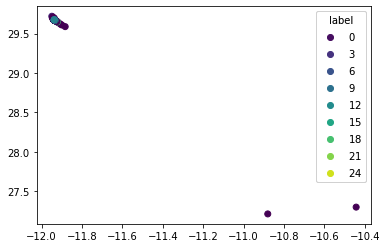

In [35]:
for data, target in RB_test_dataloader:
    with torch.no_grad():
        data = data.to(device)
        model_input = data.view(-1, 784)
        embedds = model_ae.encode(model_input).cpu().numpy()
        preds = model_ae(model_input).cpu().numpy()
        labels = target.cpu().numpy()
        inputs = model_input.cpu().numpy()
        break # just load one batch

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(embedds[:,0], embedds[:,1], c=labels)
legend = ax.legend(*scatter.legend_elements(), title='label')
ax.add_artist(legend)
fig.savefig(os.path.join(path_figures,'Section_3_4.pdf'))
plt.show()

### Question 3.2.1. How many clusters are visible in the embedding? Do they correspond to the cluster labels?
Answer: It seems that only three clusters are forming in the embedding. The variance in y is small and numbers found in the sample value of x ends up in one of the three bins.

# 4 Generative models
## 4.1 The Variational Autoencoder
### Section 1 please check vae.py
### Train your VAE on MNIST. How well does it perform on the test set relative to your vanilla autoen- coder? (You can run the VAE by executing python vae.py --arguments here).

In [49]:
path_results = os.path.join(os.getcwd(),'results')
if not os.path.exists(path_results):
    os.makedirs(path_results)
!python vae.py

Train Epoch: 1 [0/60000 (0%)]	Loss: 550.513916
Train Epoch: 1 [1280/60000 (2%)]	Loss: 310.610535
Train Epoch: 1 [2560/60000 (4%)]	Loss: 240.650162
Train Epoch: 1 [3840/60000 (6%)]	Loss: 219.223282
Train Epoch: 1 [5120/60000 (9%)]	Loss: 215.092834
Train Epoch: 1 [6400/60000 (11%)]	Loss: 208.450150
Train Epoch: 1 [7680/60000 (13%)]	Loss: 203.374268
Train Epoch: 1 [8960/60000 (15%)]	Loss: 193.761398
Train Epoch: 1 [10240/60000 (17%)]	Loss: 194.701691
Train Epoch: 1 [11520/60000 (19%)]	Loss: 192.943787
Train Epoch: 1 [12800/60000 (21%)]	Loss: 179.935974
Train Epoch: 1 [14080/60000 (23%)]	Loss: 174.059174
Train Epoch: 1 [15360/60000 (26%)]	Loss: 182.615799
Train Epoch: 1 [16640/60000 (28%)]	Loss: 168.166245
Train Epoch: 1 [17920/60000 (30%)]	Loss: 166.474197
Train Epoch: 1 [19200/60000 (32%)]	Loss: 161.467590
Train Epoch: 1 [20480/60000 (34%)]	Loss: 162.560577
Train Epoch: 1 [21760/60000 (36%)]	Loss: 151.491119
Train Epoch: 1 [23040/60000 (38%)]	Loss: 157.329208
Train Epoch: 1 [24320/60000 

### Visualize the latent space as a 2D plot, coloring each point by its label. Since our VAE is using a 20 dimensional latent space, you can try some of our dimensionality reduction tricks from the previous pset (PCA, PHATE, tSNE) to get a coherent 2 dimensional representation.

In [54]:
import phate
import scprep
# from vae import VAE

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


model_vae = VAE().to(device)
model_vae.load_state_dict(torch.load(os.path.join(path_save, 'model_vae.pth')))

<All keys matched successfully>

Calculating PHATE...
  Running PHATE on 1000 observations and 20 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 0.39 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.11 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.12 seconds.
Calculated PHATE in 1.71 seconds.


/home/xiaoranzhang/anaconda3/envs/torch_env/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:>

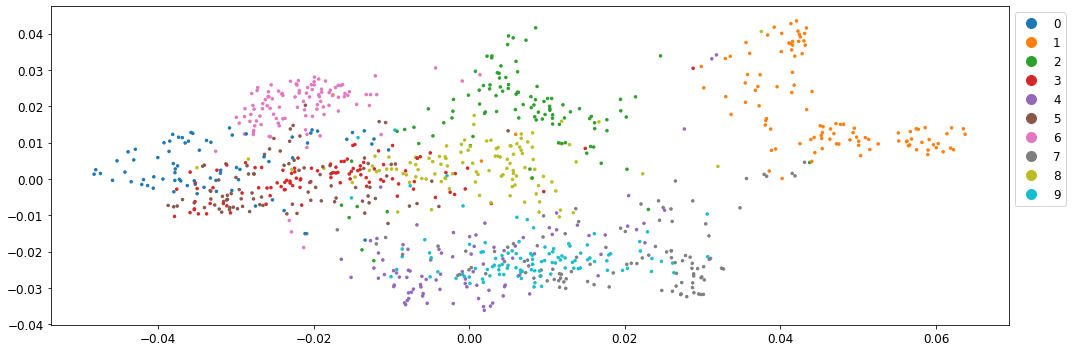

In [58]:
data_loader_1000_digits = DataLoader(mnist_train, batch_size=1000, shuffle=True)
for data, target in data_loader_1000_digits:
    with torch.no_grad():
        data = data.to(device)
        model_input = data.view(-1, 784)
        mu, logvar = model_vae.encode(model_input)
        embedds = model_vae.reparameterize(mu, logvar).cpu().numpy()
        # preds, mu, logvar = model_vae(model_input).cpu().numpy()
        labels = target.cpu().numpy()
        # inputs = model_input.cpu().numpy()

subsample_data_pc, subsample_meta = scprep.select.subsample(embedds, labels, n = 1000)
data_phate = phate.PHATE().fit_transform(subsample_data_pc)

scprep.plot.scatter2d(data_phate, c=list(subsample_meta), figsize=(15,5), legend_anchor=(1,1))

### As before, try interpolating between two different images in the latent space. Run the fabricated embedding through the decoder to generate a never-before seen digit. You may wish to try interpolating between digits of the same class in addition to digits of different classes.

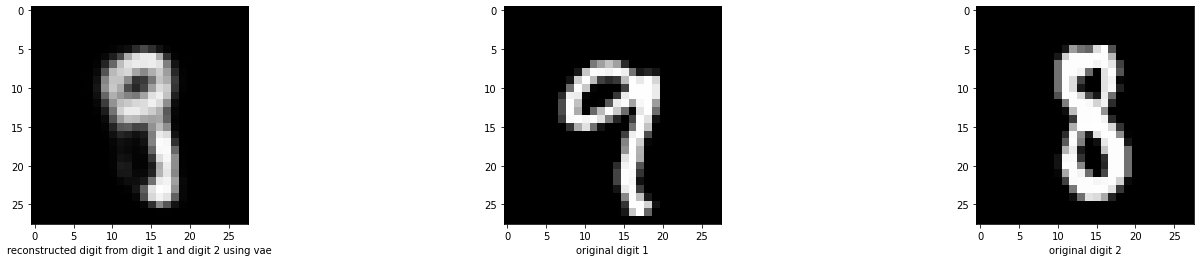

In [60]:
sample_idx_list, digit_list = [], []
for idx in range(labels.shape[0]):
    for digit in range(10):
        if labels[idx] == digit:
            if digit not in digit_list:
                sample_idx_list.append(idx)
                digit_list.append(digit)

digit_idx_1 = 0
digit_idx_2 = 1

for data, target in data_loader_1000_digits:
    with torch.no_grad():
        data = data.to(device)
        model_input = data.view(-1, 784)
        mu_1, logvar_1 = model_vae.encode(model_input[digit_list[digit_idx_1],:])
        embedds_1 = model_vae.reparameterize(mu_1, logvar_1).cpu().numpy()

        mu_2, logvar_2 = model_vae.encode(model_input[digit_list[digit_idx_2],:])
        embedds_2 = model_vae.reparameterize(mu_2, logvar_2).cpu().numpy()

        embedds_frab = (embedds_1 + embedds_2)/2
        preds = model_vae.decode(torch.from_numpy(embedds_frab).to(device)).cpu().numpy()
        break

preds_digit = preds
digit_1 = model_input[digit_list[digit_idx_1],:].cpu().numpy()
digit_2 = model_input[digit_list[digit_idx_2],:].cpu().numpy()

fig, axes = plt.subplots(1,3)
fig.set_size_inches(24,4)

axes[0].imshow(np.reshape(preds_digit, (28,28)), cmap='gray')
axes[0].set_xlabel('reconstructed digit from digit 1 and digit 2 using vae')
axes[1].imshow(np.reshape(digit_1, (28,28)), cmap='gray')
axes[1].set_xlabel('original digit 1')
axes[2].imshow(np.reshape(digit_2, (28,28)), cmap='gray')
axes[2].set_xlabel('original digit 2')

fig.savefig(os.path.join(path_figures,'Section_4_1.pdf'))
plt.show()

### Question 4.1.1. How does the VAE’s latent space compare to the latent space of your previous autoencoder? Do the generated images have more clarity? Is this most noticeable between or within classes?
Answer: The latent space of VAE seems to provide better visualizations compared to the latent space of the previous autoencoder. The generated images have more clarity. It is noticeable between classes.

### Question 4.1.2. In what situations would a VAE be more useful than a vanilla autoencoder, and when would you prefer a vanilla autoencoder to a VAE?
Answer: VAE is more suitable to employ on larger models. However, when the dataset is small and simple, AE should be tried first as it is a simpler model.

### Question 4.1.3. The distance between embeddings in your first autoencoder provided some measure of the similarity between digits. To what extent is this preserved, or improved, by the VAE?
Answer: The distance is preserved in a more continuous fashion between classes as it is designed by the reparameterization trick by VAE.

# 4.2 GANs
### Section 1-4, please check the code in GAN.py

In [82]:
!python GAN.py

 EPOCH 0. Progress: 0.0%. 
 Train gen loss: 0.33152133226394653. Train dis loss: 0.6595855355262756
 EPOCH 10. Progress: 10.0%. 
 Train gen loss: 0.733722984790802. Train dis loss: 0.4779012203216553
 EPOCH 20. Progress: 20.0%. 
 Train gen loss: 0.5379916429519653. Train dis loss: 0.5625685453414917
 EPOCH 30. Progress: 30.0%. 
 Train gen loss: 0.373367041349411. Train dis loss: 0.7363168001174927
 EPOCH 40. Progress: 40.0%. 
 Train gen loss: 0.3073600232601166. Train dis loss: 0.6076046824455261
 EPOCH 50. Progress: 50.0%. 
 Train gen loss: 1.5791900157928467. Train dis loss: 1.3175315856933594
 EPOCH 60. Progress: 60.0%. 
 Train gen loss: 0.7346891760826111. Train dis loss: 0.6737794280052185
 EPOCH 70. Progress: 70.0%. 
 Train gen loss: 0.787720263004303. Train dis loss: 0.5112329721450806
 EPOCH 80. Progress: 80.0%. 
 Train gen loss: 0.7522504925727844. Train dis loss: 0.6918277740478516
 EPOCH 90. Progress: 90.0%. 
 Train gen loss: 0.6981362700462341. Train dis loss: 0.78918635845

### Using your best performing classifier from Part 2, classify these samples.

In [18]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz # the dimension of the random noise used to seed the Generator
        self.main = nn.Sequential( # nn.sequential is a handy way of combining multiple layers.
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

nz = 25
numOfSample = 1000

model_gen = Generator(nz).to(device)
model_gen.load_state_dict(torch.load(os.path.join(path_save, 'model_gen.pth')))
noise = torch.randn((numOfSample, nz)).to('cuda')
noise = torch.clamp(noise, 1e-8, 1)
generated_img = model_gen(noise).detach()

In [14]:
class FeedForwardNet(nn.Module):
    """ Simple feed forward network with one hidden layer."""
    def __init__(self): # initialize the model
        super(FeedForwardNet, self).__init__() # call for the parent class to initialize
        self.W1 = nn.Parameter(nn.init.uniform_(torch.empty((784, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))
        self.b1 = nn.Parameter(nn.init.uniform_(torch.empty((1, 128)), a=-np.sqrt(1/128), b=np.sqrt(1/128)))

        self.W2 = nn.Parameter(nn.init.uniform_(torch.empty((128, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))
        self.b2 = nn.Parameter(nn.init.uniform_(torch.empty((1, 10)), a=-np.sqrt(1/10), b=np.sqrt(1/10)))

        # Make sure to add another weight and bias vector to represent the hidden layer.

    def forward(self, x):
        # put the logic here.
        layer1_out = relu(torch.matmul(x, self.W1) + self.b1)
        layer2_out = softmax(relu(torch.matmul(layer1_out, self.W2) + self.b2))

        predictions = layer2_out

        return predictions

model_FCN = FeedForwardNet().to(device)
model_FCN.load_state_dict(torch.load(os.path.join(path_save, 'model_relu_bs_128_lr_0.5_epoch_50.pth')))

prediction_onehot = model_FCN(generated_img.to(device).view(-1, 784))
prediction = torch.argmax(prediction_onehot, dim=1)

/tmp/ipykernel_20559/969223363.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  layer2_out = softmax(relu(torch.matmul(layer1_out, self.W2) + self.b2))


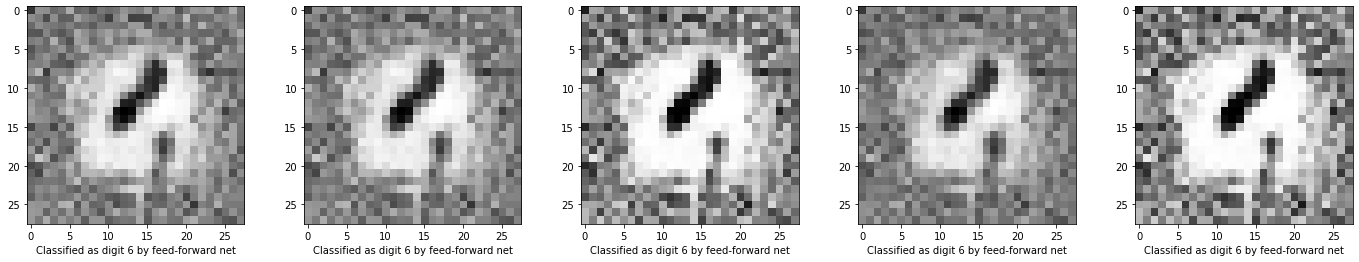

In [17]:
fig, axes = plt.subplots(1,5)
fig.set_size_inches(24,4)

for i in range(5):
    axes[i].imshow(np.reshape(generated_img[i].cpu().numpy(), (28, 28)), cmap='gray')
    axes[i].set_xlabel('Classified as digit {} by feed-forward net'.format(str(prediction.cpu().numpy()[i])))

fig.savefig(os.path.join(path_figures,'Section_4_2.pdf'))
plt.show()

### Question 4.2.1. Which generates more realistic images: your GAN, or your VAE? Why do you think this is?
Answer: VAE generates more realistic images compared to GAN. This might due to that VAE learns from handwritten digit but the GAN learns from the noise.

### Does your GAN appear to generate all digits in equal number, or has it specialized in a smaller number of digits? If so, why might this be?
Answer: The GAN does not appear to generate all digits in equal number. It seems to be specialized in a smaller number of digits. It seems to generate digits such as 0 as a lot of numbers (9, 6, 8) has curves.

# 5 Information Theory
## 5.1 Simple Distribution
### Compute the Kullback-Leibler (KL) Divergence of the two distributions.

In [6]:
mean = [0, 0, 0]
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
numOfSample = 1000
X_normal = np.random.multivariate_normal(mean, cov, numOfSample)
X_uniform = np.random.uniform(0, 1, (numOfSample,3))

In [7]:
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity
from time import perf_counter

kde_normal = KernelDensity(kernel='gaussian').fit(X_normal)
kde_uniform = KernelDensity(kernel='gaussian').fit(X_uniform)

prob_normal = np.exp(kde_normal.score_samples(X_normal))
prob_uniform = np.exp(kde_uniform.score_samples(X_uniform))

In [8]:
def func_KL_div(prob_distr1, prob_distr2):

    start_time = perf_counter()
    KL_div = entropy(prob_distr1, prob_distr2)
    end_time = perf_counter()

    return KL_div, end_time-start_time

print('KL normal to uniform: {}. Time elapsed: {}'.format(func_KL_div(prob_normal, prob_uniform)[0], func_KL_div(prob_normal, prob_uniform)[1]))
print('KL uniform to normal: {}. Time elapsed: {}'.format(func_KL_div(prob_uniform, prob_normal)[0], func_KL_div(prob_uniform, prob_normal)[1]))

KL normal to uniform: 0.1044634109528535. Time elapsed: 0.0014169570058584213
KL uniform to normal: 0.1365064541750548. Time elapsed: 0.0003813920193351805


### Compute the Earth Mover’s Distance (EMD) between the two distributions.

In [9]:
from scipy.spatial import distance_matrix
from pyemd import emd

def func_EMD(prob_distr1, prob_distr2):
    if prob_distr1.ndim == 1 and prob_distr2.ndim == 1:
        dist_mat = distance_matrix(np.expand_dims(prob_distr1, 1), np.expand_dims(prob_distr2, 1))
    else:
        dist_mat = distance_matrix(prob_distr1, prob_distr2)

    start_time = perf_counter()
    emd_dist = emd(prob_distr1, prob_distr2, dist_mat)
    end_time = perf_counter()

    return emd_dist, end_time-start_time

print('EMD distance: {}. Time elapsed: {}'.format(func_EMD(prob_normal, prob_uniform)[0], func_EMD(prob_normal, prob_uniform)[1]))

EMD distance: 2.1257755820697755. Time elapsed: 0.08436427998822182


### Compute the Maximum Mean Discrepancy (MMD) between the two distributions.

In [26]:
def mmd(X,Y, kernel_fn):
    """
    Implementation of Maximum Mean Discrepancy.
    :param X: An n x 1 numpy vector containing the samples from distribution 1.
    :param Y: An n x 1 numpy vector containing the samples from distribution 2.
    :param kernel_fn: supply the kernel function to use.
    :return: the maximum mean discrepancy:
    MMD(X,Y) = Expected value of k(X,X) + Expected value of k(Y,Y) - Expected value of k(X,Y)
    where k is a kernel function
    """
    mmd = np.mean(kernel_fn(X, X)) + np.mean(kernel_fn(Y, Y)) - np.mean(kernel_fn(X, Y))
    return mmd


def kernel(A, B):
    """
    A gaussian kernel on two arrays.
    :param A: An n x d numpy matrix containing the samples from distribution 1
    :param B: An n x d numpy matrix containing the samples from distribution 2.
    :return K:  An n x n numpy matrix k, in which k_{i,j} = e^{-||A_i - B_j||^2/(2*sigma^2)}
    """
    sigma = 1
    K = np.exp(-np.abs(A-B)**2 / 2*sigma**2 )
    return K

In [27]:
def func_MMD(X_distr1, X_distr2):
    start_time = perf_counter()
    mmd_dist = mmd(X_distr1, X_distr2, kernel)
    end_time = perf_counter()

    return mmd_dist, end_time-start_time

print('MMD distance: {}. Time elapsed: {}'.format(func_MMD(X_normal, X_uniform)[0], func_MMD(X_normal, X_uniform)[1]))

MMD distance: 1.3476897524249987. Time elapsed: 0.0004335150006227195


### Question 5.1.1. Based on the above measures alone, which divergence seems most accurate?
Answer: I think MMD distance seems most accurate and KL divergence is small and EMD seems to be way too large.

## 5.2 MNIST Sample Distributions
### Compute the Kullback-Leibler (KL) Divergence of the two distributions. 

In [12]:
from sklearn.decomposition import PCA

indices = torch.randperm(len(mnist_test))[:2000]

subset1 = torch.utils.data.Subset(mnist_test, indices[:1000])
subset2 = torch.utils.data.Subset(mnist_test, indices[1000:])

subset1_img_list, subset2_img_list = [], []
for img, lab in subset1:
    subset1_img_list.append(img.view(-1, 784).cpu().numpy())

for img, lab in subset2:
    subset2_img_list.append(img.view(-1, 784).cpu().numpy())

subset1_img_arr = np.concatenate(subset1_img_list, axis=0)
subset2_img_arr = np.concatenate(subset2_img_list, axis=0)

PCA_subset1 = PCA(n_components=8)
PCA_subset2 = PCA(n_components=8)

subset1_img_arr_PCA = PCA_subset1.fit_transform(subset1_img_arr)
subset2_img_arr_PCA = PCA_subset2.fit_transform(subset2_img_arr)

kde_subset1 = KernelDensity(kernel='gaussian').fit(subset1_img_arr_PCA)
kde_subset2 = KernelDensity(kernel='gaussian').fit(subset2_img_arr_PCA)

prob_subset1 = np.exp(kde_subset1.score_samples(subset1_img_arr_PCA))
prob_subset2 = np.exp(kde_subset2.score_samples(subset2_img_arr_PCA))

print('KL subset 1 to subset 2: {}. Time elapsed: {}'.format(func_KL_div(prob_subset1, prob_subset2)[0], func_KL_div(prob_subset1, prob_subset2)[1]))
print('KL subset 2 to subset 1: {}. Time elapsed: {}'.format(func_KL_div(prob_subset2, prob_subset1)[0], func_KL_div(prob_subset2, prob_subset1)[1]))

KL subset 1 to subset 2: 0.6715729293338801. Time elapsed: 9.958405280485749e-05
KL subset 2 to subset 1: 0.6040136198016678. Time elapsed: 0.001682029978837818


### Compute the Earth Mover’s Distance (EMD) between the two distributions.

In [22]:
print('EMD distance: {}. Time elapsed: {}'.format(func_EMD(prob_subset1, prob_subset2)[0], func_EMD(prob_subset1, prob_subset2)[1]))

EMD distance: 4.286459269002608e-09. Time elapsed: 102.3937361909775


### Compute the Maximum Mean Discrepancy (MMD) between the two distributions.

In [57]:
print('MMD distance: {}. Time elapsed: {}'.format(func_MMD(subset1_img_arr_PCA, subset2_img_arr_PCA)[0], func_MMD(subset1_img_arr_PCA, subset2_img_arr_PCA)[1]))

MMD distance: 1.6058905124664307. Time elapsed: 0.0007556750206276774


## 5.3 The GAN Distribution
### Compute the Kullback-Leibler (KL) Divergence of the two distributions.

In [19]:
GAN_subset = generated_img.to(device).view(-1, 784).cpu().numpy()

PCA_GAN_subset = PCA(n_components=8)

GAN_subset_PCA = PCA_GAN_subset.fit_transform(GAN_subset)

kde_GAN_subset = KernelDensity(kernel='gaussian').fit(GAN_subset_PCA)

prob_GAN_subset = np.exp(kde_GAN_subset.score_samples(GAN_subset_PCA))

print('KL GAN to subset 2: {}. Time elapsed: {}'.format(func_KL_div(prob_GAN_subset, prob_subset2)[0], func_KL_div(prob_GAN_subset, prob_subset2)[1]))
print('KL subset 2 to GAN: {}. Time elapsed: {}'.format(func_KL_div(prob_subset2, prob_GAN_subset)[0], func_KL_div(prob_subset2, prob_GAN_subset)[1]))

KL GAN to subset 2: 0.32365281083383224. Time elapsed: 8.877599611878395e-05
KL subset 2 to GAN: 0.3972692551239079. Time elapsed: 0.0003860080032609403


### Compute the Earth Mover’s Distance (EMD) between the two distributions.

In [21]:
print('EMD distance: {}. Time elapsed: {}'.format(func_EMD(prob_GAN_subset, prob_subset2)[0], func_EMD(prob_GAN_subset, prob_subset2)[1]))

EMD distance: 5.2296565691887656e-05. Time elapsed: 0.08263151004211977


### Compute the Maximum Mean Discrepancy (MMD) between the two distributions.

In [20]:
print('MMD distance: {}. Time elapsed: {}'.format(func_MMD(GAN_subset_PCA, subset2_img_arr_PCA)[0], func_MMD(GAN_subset_PCA, subset2_img_arr_PCA)[1]))

MMD distance: 1.503627061843872. Time elapsed: 0.003175096004270017


### Question 5.3.1. Which divergence or distance showed the greatest discrepancy between the comparison between real MNIST data and the comparison with the GAN?
Answer: MMD shows the greatest discrepancy between the real MNISt samples and the generated fake samples from GAN.

### Question 5.3.2. Which of these information measures would you recommend for judging a GAN’s output? Why?
Answer: I recommend using EMD to judge a GAN's output. EMD is the only metric that shows larger discrepancy compared to the MNIST distribution example. As the GAN's fake output is visually worse than the real data, EMD seems to capture such charateristics.

### Question 5.3.3. How do the runtimes of these measures compare?
Answer: It seems that the EMD takes the longest time as a distance matrix needs to be computed. The EMD computation of two distinct MNIST data takes very long. KL divergence seems to be the fastest metric and its runtime is comparable to MMD.
